In [ ]:
# I chose not to attach requirements file (too many libs in my env).
# As Torch is prone to issues with different versions, here are the ones I use:

# pytorch-lightning==2.3.2
# torch==2.0.0
# torchmetrics==1.4.0.post0

Load the data

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [174]:
train = pd.read_csv('data/Task5_train.csv')
test = pd.read_csv('data/Task5_test.csv')
X_train = train.iloc[:, 1:]
X_test = test.iloc[:, 1:]
y_train = train.Y
y_test = test.Y

Let's start our

# EDA

First glance at the data

In [3]:
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120
0,-3.375223,-10.380706,14.488187,42.433324,3.567948,-0.407952,-0.778009,-6.806665,0.304032,-27.311202,...,17.842198,-4.235979,-3.090988,-16.809032,-17.604523,-12.415682,-11.636028,-0.784215,-18.296195,15.515276
1,-3.071530,-22.425550,4.060582,19.652617,-7.134599,-7.201065,-0.175808,33.717211,-2.658686,3.295941,...,10.305863,-0.077751,-16.040180,-2.143216,4.328842,33.620275,10.241176,-13.356787,-46.001087,22.231516
2,2.512906,11.003405,13.591295,-6.510962,-1.534895,-3.742965,0.455756,30.643341,-0.766931,0.431625,...,2.116266,-6.212255,-30.838870,2.446050,-11.532322,34.203352,-6.748755,-4.030347,-0.224291,-9.694489
3,0.485973,-15.891477,34.422507,-3.772496,-3.618411,3.278072,-0.229292,-11.056757,40.921275,-24.529393,...,13.309494,-6.547626,-26.224855,9.565147,-1.454725,-14.300701,-36.518918,-3.287786,17.748986,6.813862
4,-8.140371,6.173805,6.635861,4.463215,-0.964935,5.543937,0.862716,-11.539494,21.111441,-49.672076,...,12.194029,-4.621176,-11.836028,-17.734702,-8.545210,-17.500975,-59.559999,4.269054,-6.706806,22.321941


Nice to see no NaNs

In [4]:
train.isna().sum().sum()

0

Check some statistics. Notice that features have different scales (min, max).

In [5]:
X_train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,...,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000
mean,0.065044,-0.320009,-0.214810,0.165348,-0.028066,-0.078992,0.019217,-0.796630,-0.397053,-0.364354,...,-0.028033,-0.171237,-0.940235,0.005883,0.481750,-0.064731,0.708477,-0.077937,0.449402,0.150741
std,9.212750,31.618318,21.218423,17.981792,4.417210,4.831726,1.767082,24.541710,17.272902,25.869206,...,12.253998,5.530775,32.701291,20.317802,16.557594,25.687906,22.582052,6.692452,28.679562,16.285427
min,-32.750508,-112.821002,-76.372344,-59.385102,-17.243207,-14.605973,-6.264596,-102.506609,-65.857841,-83.671835,...,-39.575647,-17.966558,-105.212720,-63.699492,-54.934389,-81.598101,-86.506053,-22.870528,-104.778210,-58.422769
25%,-6.216707,-20.807051,-14.200681,-11.746565,-2.895480,-3.491570,-1.154605,-17.519233,-11.930161,-18.681122,...,-8.624711,-3.926481,-23.549552,-13.875948,-10.964813,-17.744928,-14.463117,-4.572325,-19.827259,-10.716968
50%,0.139897,-0.142107,-0.146990,-0.184580,-0.024183,-0.112723,-0.011159,-0.328636,0.182367,-0.518611,...,-0.229801,-0.164544,-1.264771,0.271284,0.397879,0.369784,0.975176,-0.166572,-0.028327,0.419216
75%,6.343253,21.808864,14.483109,12.838584,2.954960,3.288138,1.197403,15.689758,10.861546,16.655059,...,8.561840,3.642284,20.901101,13.650989,12.093973,17.894726,15.880992,4.480097,19.208877,10.951560
max,30.678800,105.193338,67.394506,59.695998,15.866140,14.719497,5.697377,78.192440,68.950906,102.791888,...,49.066097,18.323139,113.474413,70.906775,50.572982,80.334316,81.681457,25.831268,114.691985,53.942028


Let's see how some random feature is distributed:

<Axes: >

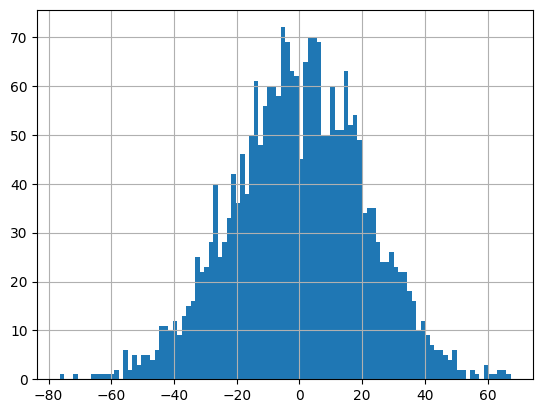

In [6]:
X_train.X3.hist(bins=100)

Looks much like normal distribution...🤔

Maybe all of them are normally distributed? This will be helpful when detecting outliers and choosing scaler

Let's rely on Shapiro-Wilk test

In [7]:
from scipy.stats import shapiro

In [8]:
shapiro_p_values = shapiro(X_train.to_numpy(), axis=0).pvalue
np.array(range(1, 121))[shapiro_p_values < 0.05]
print('Not normally distributed features: ')
X_train.iloc[:, np.array(range(1, 121))[shapiro_p_values < 0.05] - 1]

Not normally distributed features: 


,X42,X57
0,-4.854999,0.458916
1,-13.982503,2.151459
2,-18.602669,-0.666477
3,-35.161610,-5.373842
4,-27.373220,-2.293388
...,...,...
2370,25.161364,-2.238848
2371,7.911103,4.220831
2372,29.379239,2.206497
2373,9.825710,2.078136


Let's look at their distribution:

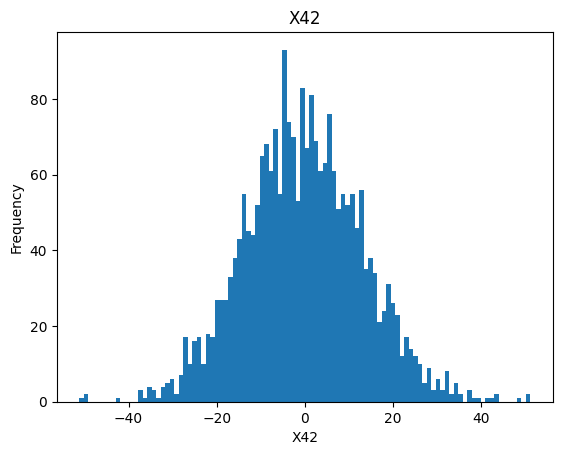

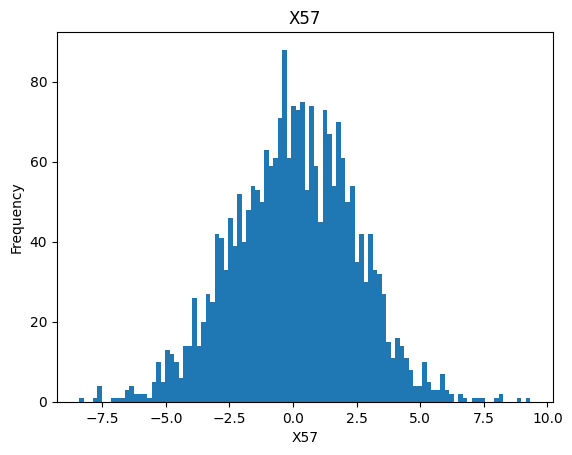

In [9]:
for col in ['X42', 'X57']:
    plt.figure()  
    plt.hist(X_train[col], bins=100)
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

These features are actually not that far from normal distribution, as we can see. We will also check test data, just in case

In [10]:
shapiro_p_values = shapiro(X_test.to_numpy(), axis=0).pvalue
np.array(range(1, 121))[shapiro_p_values < 0.05]
print('Not normally distributed features: ')
X_test.iloc[:, np.array(range(1, 121))[shapiro_p_values < 0.05] - 1]

Not normally distributed features: 


,X22,X35,X47,X54,X101,X103,X110
0,9.186542,-14.039194,-7.018801,20.391202,0.004473,4.588566,-3.356380
1,0.659404,58.762926,-2.715903,-27.916658,0.649862,-18.352445,6.121010
2,5.652510,6.582498,0.384491,56.665657,1.762384,-20.074534,4.693267
3,0.597592,12.179153,-2.172476,-58.202845,-1.544219,7.069699,-4.399487
4,-5.040151,-49.760326,-3.450827,12.632065,-1.176006,7.498262,-1.596217
...,...,...,...,...,...,...,...
520,-1.413920,-21.126212,6.441831,-8.343242,1.030827,-2.557943,1.358352
521,-2.548709,8.400174,-0.240080,-15.296100,-1.371371,9.834404,-0.106258
522,0.964726,-18.469909,3.087944,3.742186,-0.255414,5.061778,-2.372808
523,2.798954,23.176773,-0.338544,2.841688,-0.615315,17.074834,-2.875590


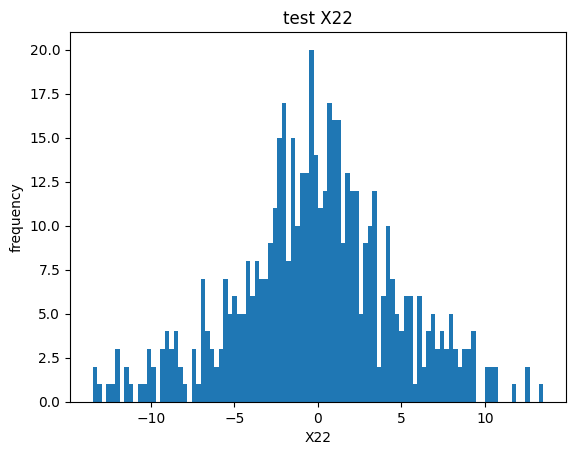

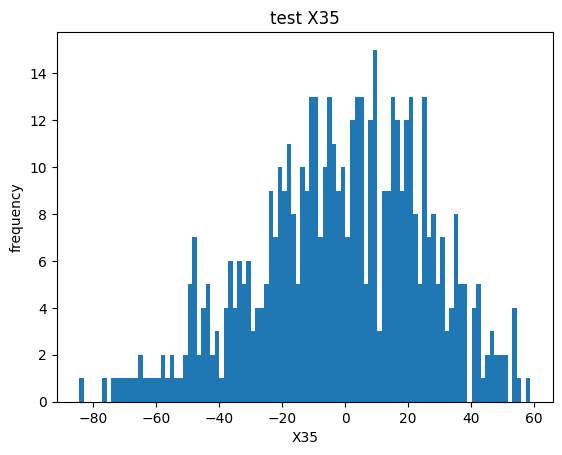

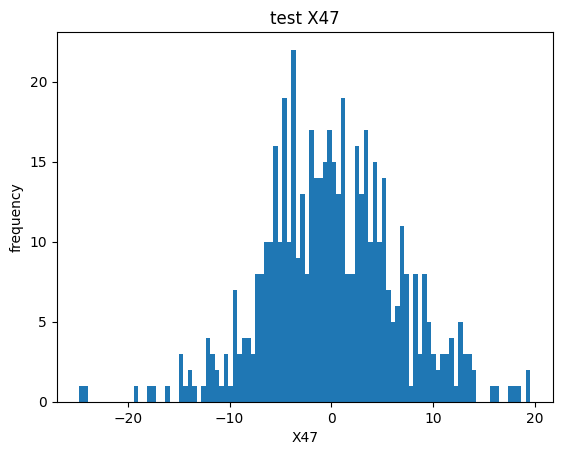

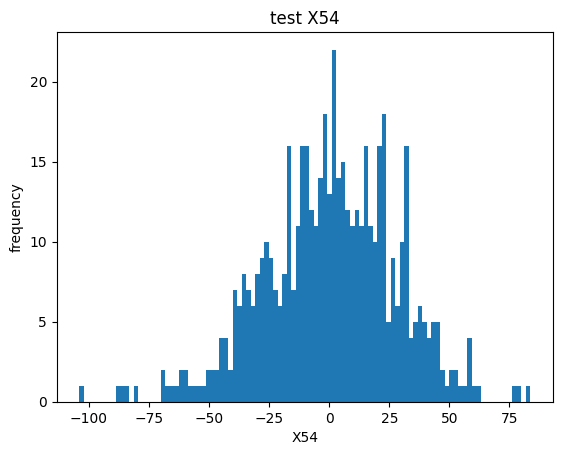

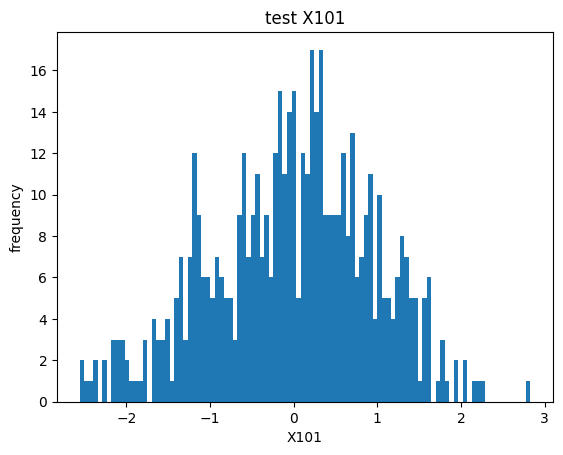

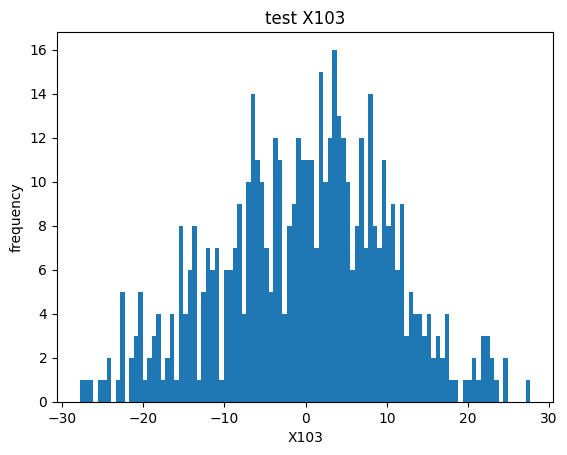

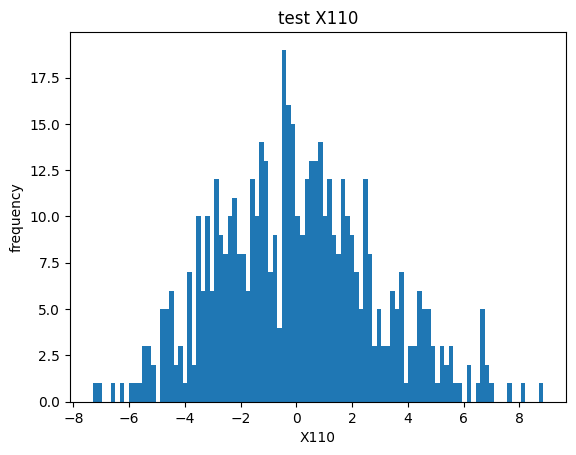

In [11]:
for col in X_test.iloc[:, np.array(range(1, 121))[shapiro_p_values < 0.05] - 1].columns:
    plt.figure()  
    plt.hist(X_test[col], bins=100)
    plt.title(f'test {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')

Same for the test, not so much data is far from normality.
Also, if we knew for sure that train and test data came from the exact same process, these test features must have been, in fact, normally distributed

Okay, let's find outliers in data. Relying on normality, we can use z-scores

In [12]:
from sklearn.preprocessing import StandardScaler

In [169]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

Text(0, 0.5, 'frequency')

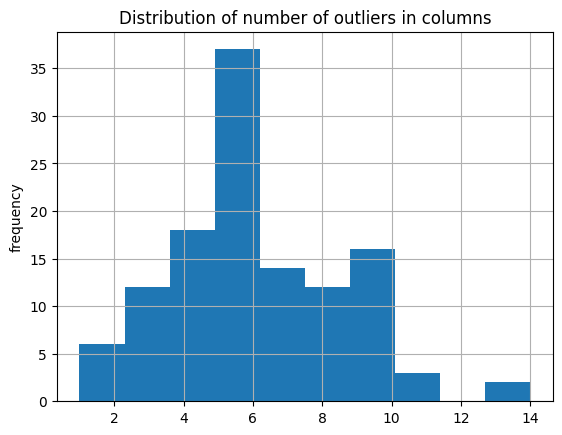

In [14]:
(X_train_scaled.abs() > 3).sum().hist(bins=10)
plt.title('Distribution of number of outliers in columns')
plt.ylabel('frequency')

We see up to 14 outliers in columns. As we do not know the nature of the data, there is no guarantee they come from error, so they can carry important information. We won't remove them in main dataset. Instead, let's create another dataset where we replace them by mean, and train a model later on both datasets for comparison.

Replace outliers for train:

In [15]:
outliers_coordinates = (X_train_scaled.abs() > 3).stack()
outliers_coordinates = outliers_coordinates[outliers_coordinates == True].keys()
outliers_cols = [x[1] for x in outliers_coordinates]
outliers_inds = [x[0] for x in outliers_coordinates]

In [16]:
X_train_scaled_no_outliers = X_train_scaled.copy(deep=True)
for coords in outliers_coordinates:
    X_train_scaled_no_outliers.loc[coords[0], coords[1]] = X_train_scaled_no_outliers[coords[1]].mean()

No outliers in new dataset:

In [18]:
(X_train_scaled_no_outliers.abs() > 3).sum().sum()

0

Now, for the target:

Text(0, 0.5, 'frequency')

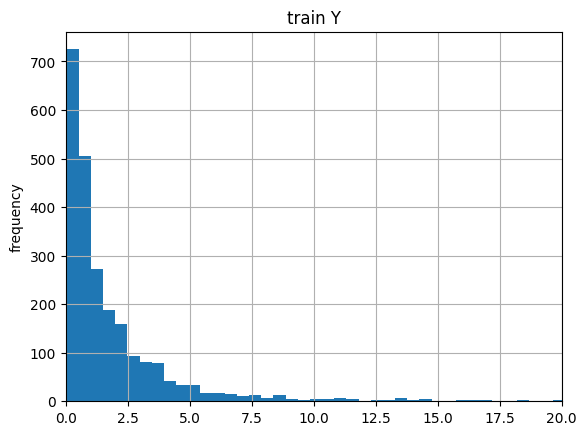

In [19]:
y_train.hist(bins=100)
plt.xlim(0,20)
plt.title(f'train Y')
plt.ylabel('frequency')

Reminds of some distribution..

'<img src="img/maths_meme.jpg" width="250" height="150">'

Looks like exp 

We can logarithmize that

Text(0, 0.5, 'frequency')

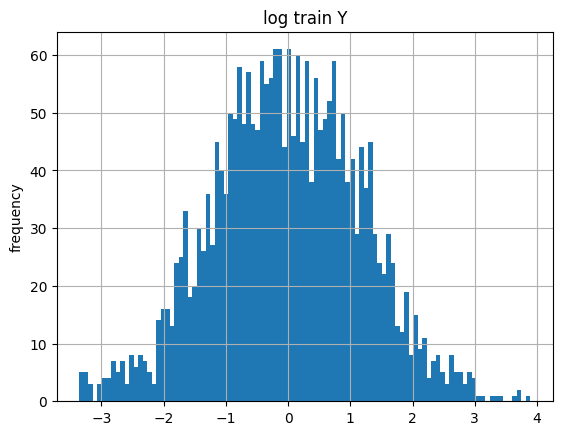

In [20]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
y_train_log.hist(bins=100)
plt.title(f'log train Y')
plt.ylabel('frequency')

Considering the simplicity of the data, it seems that linear models from classic ML will be a good choice. Therefore, we better check for collinearity in features because it can affect some linear models' performance

In [21]:
pearson_corr = X_train_scaled.corr(method='pearson')
threshold_R2 = 0.7
correlated = pearson_corr.abs()**2 > threshold_R2
true_indices = np.where(correlated.values == True)
true_positions = [(correlated.index[i], correlated.columns[j]) for i, j in zip(*true_indices) if correlated.index[i] != correlated.columns[j]]

Yay! No correlations found:

In [22]:
true_positions

[]

We checked for the missing values, collinearity and even brought target value to the normal distribution. Let's get to the

# ML part

## SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)
print('MSE and R2 on test:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))
print()

svr.fit(X_train_scaled, y_train_log)
y_pred_log = svr.predict(X_test_scaled)
y_pred = np.exp(y_pred_log)
print('MSE and R2 on test, logarithmized target:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))
print()

svr.fit(X_train_scaled_no_outliers, y_train_log)
y_pred_log = svr.predict(X_test_scaled)
y_pred = np.exp(y_pred_log)
print('MSE and R2 on test, logarithmized target and no outliers in data:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))
print()

MSE and R2 on test: 3.801021236194246 0.5529828725402168

MSE and R2 on test, logarithmized target: 2.07285386909759 0.7562230977863051

MSE and R2 on test, logarithmized target and no outliers in data: 2.2648703296171835 0.7336411017192679



For dataset with outliers metrics are better. Also, default was rbf kernel, we should check linear one:

In [171]:
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train_log)
y_pred_log = svr.predict(X_test_scaled)
y_pred = np.exp(y_pred_log)
print('MSE and R2 on test, logarithmized target:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))
print()

MSE and R2 on test, logarithmized target: 0.10638280045545129 0.9874889060292814



Great! It worked. We achieved R2 0.9875. Maybe other linear models will perform even better?

## Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
logreg = LinearRegression()
logreg.fit(X_train_scaled, y_train_log)
y_pred_log = logreg.predict(X_test_scaled)
y_pred = np.exp(y_pred_log)
print('MSE and R2 on test, logarithmized target:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))
print()

MSE and R2 on test, logarithmized target: 0.110528691250168 0.9870013306965869



## Ridge

In [27]:
from sklearn.linear_model import Ridge

In [28]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train_log)
y_pred_log = ridge.predict(X_test_scaled)
y_pred = np.exp(y_pred_log)
print('MSE and R2 on test, logarithmized target:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))
print()

MSE and R2 on test, logarithmized target: 0.11050240340285215 0.9870044222652112



SVR showed the best results with MSE 0.1064 and R<sup>2</sup> 0.9875.
You can use a saved model to check:

In [ ]:
import pickle

# with open('models/svr.pkl', 'wb') as f:
#     pickle.dump(svr, f)

# loading and checking: 
with open('models/svr.pkl', 'rb') as f:
    svr = pickle.load(f)
y_pred_log = svr.predict(X_test_scaled)
y_pred = np.exp(y_pred_log)
print('MSE and R2 on test, logarithmized target', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))
print()

No need to try decision trees

# DL part

I will use the simplest model here because of simple data patterns. Using more complicated models will lead to unnecessary abundance of parameters and overfitting. So, let's try two-layer dense neural network 

In [139]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import pytorch_lightning as pl
import warnings
warnings.filterwarnings("ignore")
from torchmetrics import R2Score, MeanSquaredError
from sklearn.model_selection import KFold

I use Lightning to automate training.

Let's set weight_decay for use in [AdamW](https://stackoverflow.com/questions/64621585/pytorch-optimizer-adamw-and-adam-with-weight-decay) optimizer as a changeable parameter (in case there is overfitting and changing learning rate doesn't help, we can quickly use it). 

In [193]:
class TwoLayerNN(pl.LightningModule):
    def __init__(self, input_dim=120, output_dim=1, learning_rate=1e-3, weight_decay=0):
        super().__init__()
        self.save_hyperparameters() 
        self.fc1 = nn.Linear(in_features=input_dim, out_features=60)
        self.fc2 = nn.Linear(in_features=60, out_features=output_dim)
        self.learning_rate = learning_rate
        self.weight_decay = weight_decay
        self.mse = MeanSquaredError()
        self.r2 = R2Score()

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def training_step(self, batch, batch_idx):
        X, y = batch
        predictions = self(X).squeeze()

        mse_loss = self.mse(predictions, y)
        r2_score = self.r2(predictions, y)
        self.log('train_mse', mse_loss, prog_bar=True)
        self.log('train_r2', r2_score, prog_bar=True)

        return mse_loss

    def validation_step(self, batch, batch_idx):
        X, y = batch
        predictions = self(X).squeeze()

        mse_loss = self.mse(predictions, y)
        r2_score = self.r2(predictions, y)
        self.log('val_mse', mse_loss, prog_bar=True)
        self.log('val_r2', r2_score, prog_bar=True)

    def configure_optimizers(self):
        return torch.optim.AdamW(self.parameters(), lr=self.learning_rate, weight_decay=self.weight_decay)

In [187]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)  
        self.y = torch.tensor(y, dtype=torch.float32) 

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

We will use cross-validation to get representative validation metrics set.

After several manual trials I've found optimal learning rate and number of epochs to achieve high metrics and not overfit.

If the task was more complicated, I would choose a logger to track metrics and search for hyperparameters.

In [201]:
class CrossValidation:
    def __init__(self, model_class, dataset, n_splits, batch_size, learning_rate, max_epochs):
        self.model_class = model_class
        self.dataset = dataset
        self.n_splits = n_splits
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs

    def run_cv(self):
        kf = KFold(n_splits=self.n_splits, shuffle=True, random_state=0)
        fold_results = {'val_mse': [], 'val_r2': []}
        fold_num = 1

        for train_idx, val_idx in kf.split(self.dataset):
            print('------------------')
            print(f"FOLD # {fold_num}")
            print('------------------')
            fold_num += 1

            train_subset = torch.utils.data.Subset(self.dataset, train_idx)
            val_subset = torch.utils.data.Subset(self.dataset, val_idx)
            train_loader = DataLoader(train_subset, batch_size=self.batch_size, shuffle=True)
            val_loader = DataLoader(val_subset, batch_size=self.batch_size, shuffle=False)

            model = self.model_class(learning_rate=self.learning_rate)

            trainer = pl.Trainer(max_epochs=self.max_epochs, logger=False)
            trainer.fit(model, train_loader, val_loader)
            fold_results['val_mse'].append(model.trainer.callback_metrics['val_mse'].item())
            fold_results['val_r2'].append(model.trainer.callback_metrics['val_r2'].item())
            
        self.model = model
        avg_val_mse = sum(fold_results['val_mse']) / fold_num
        avg_val_r2 = sum(fold_results['val_r2']) / fold_num
        print(f"Average validation MSE: {avg_val_mse}")
        print(f"Average validation R2: {avg_val_r2}")


dataset = MyDataset(X_train_scaled.values, y_train_log)
cv = CrossValidation(TwoLayerNN, dataset, n_splits=5, batch_size=32, learning_rate=1e-4, max_epochs=26)
cv.run_cv()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name | Type             | Params | Mode 
--------------------------------------------------
0 | fc1  | Linear           | 7.3 K  | train
1 | fc2  | Linear           | 61     | train
2 | mse  | MeanSquaredError | 0      | train
3 | r2   | R2Score          | 0      | train
--------------------------------------------------
7.3 K     Trainable params
0         Non-trainable params
7.3 K     Total params
0.029     Total estimated model params size (MB)


------------------
FOLD # 1
------------------
Epoch 25: 100%|██████████| 60/60 [00:00<00:00, 163.96it/s, train_mse=0.0476, train_r2=0.974, val_mse=0.0437, val_r2=0.969]

`Trainer.fit` stopped: `max_epochs=26` reached.


Epoch 25: 100%|██████████| 60/60 [00:00<00:00, 156.72it/s, train_mse=0.0476, train_r2=0.974, val_mse=0.0437, val_r2=0.969]

GPU available: False, used: False



------------------
FOLD # 2
------------------


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name | Type             | Params | Mode 
--------------------------------------------------
0 | fc1  | Linear           | 7.3 K  | train
1 | fc2  | Linear           | 61     | train
2 | mse  | MeanSquaredError | 0      | train
3 | r2   | R2Score          | 0      | train
--------------------------------------------------
7.3 K     Trainable params
0         Non-trainable params
7.3 K     Total params
0.029     Total estimated model params size (MB)


Epoch 25: 100%|██████████| 60/60 [00:00<00:00, 180.87it/s, train_mse=0.0239, train_r2=0.984, val_mse=0.0499, val_r2=0.962]

`Trainer.fit` stopped: `max_epochs=26` reached.


Epoch 25: 100%|██████████| 60/60 [00:00<00:00, 180.87it/s, train_mse=0.0239, train_r2=0.984, val_mse=0.0499, val_r2=0.962]
------------------
FOLD # 3
------------------


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name | Type             | Params | Mode 
--------------------------------------------------
0 | fc1  | Linear           | 7.3 K  | train
1 | fc2  | Linear           | 61     | train
2 | mse  | MeanSquaredError | 0      | train
3 | r2   | R2Score          | 0      | train
--------------------------------------------------
7.3 K     Trainable params
0         Non-trainable params
7.3 K     Total params
0.029     Total estimated model params size (MB)


Epoch 25: 100%|██████████| 60/60 [00:00<00:00, 147.76it/s, train_mse=0.0616, train_r2=0.951, val_mse=0.047, val_r2=0.965] 

`Trainer.fit` stopped: `max_epochs=26` reached.


Epoch 25: 100%|██████████| 60/60 [00:00<00:00, 147.76it/s, train_mse=0.0616, train_r2=0.951, val_mse=0.047, val_r2=0.965]

GPU available: False, used: False



------------------
FOLD # 4
------------------


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name | Type             | Params | Mode 
--------------------------------------------------
0 | fc1  | Linear           | 7.3 K  | train
1 | fc2  | Linear           | 61     | train
2 | mse  | MeanSquaredError | 0      | train
3 | r2   | R2Score          | 0      | train
--------------------------------------------------
7.3 K     Trainable params
0         Non-trainable params
7.3 K     Total params
0.029     Total estimated model params size (MB)


Epoch 25: 100%|██████████| 60/60 [00:00<00:00, 118.64it/s, train_mse=0.0293, train_r2=0.976, val_mse=0.0419, val_r2=0.966]

`Trainer.fit` stopped: `max_epochs=26` reached.


Epoch 25: 100%|██████████| 60/60 [00:00<00:00, 116.23it/s, train_mse=0.0293, train_r2=0.976, val_mse=0.0419, val_r2=0.966]
------------------
FOLD # 5
------------------


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name | Type             | Params | Mode 
--------------------------------------------------
0 | fc1  | Linear           | 7.3 K  | train
1 | fc2  | Linear           | 61     | train
2 | mse  | MeanSquaredError | 0      | train
3 | r2   | R2Score          | 0      | train
--------------------------------------------------
7.3 K     Trainable params
0         Non-trainable params
7.3 K     Total params
0.029     Total estimated model params size (MB)


Epoch 25: 100%|██████████| 60/60 [00:00<00:00, 112.97it/s, train_mse=0.0273, train_r2=0.992, val_mse=0.049, val_r2=0.960] 

`Trainer.fit` stopped: `max_epochs=26` reached.


Epoch 25: 100%|██████████| 60/60 [00:00<00:00, 112.97it/s, train_mse=0.0273, train_r2=0.992, val_mse=0.049, val_r2=0.960]
Average validation MSE: 0.03857769320408503
Average validation R2: 0.8036013146241506


Average validation R2 is > 0.8, so let's try it on test data

In [203]:
my_model = cv.model
my_model.eval()
# if you want to load the model:
# my_model = torch.load('models/TwoLayerNN.pth')
with torch.no_grad():  
    predictions = my_model(torch.tensor(X_test_scaled.values, dtype=torch.float32))
    predictions_train = my_model(torch.tensor(X_train_scaled.values, dtype=torch.float32))

print("MSE and R2 on test:", mean_squared_error(y_test, np.exp(predictions.view(-1))), r2_score(y_test, np.exp(predictions.view(-1))))
print("MSE and R2 on train:", mean_squared_error(y_train, np.exp(predictions_train.view(-1))), r2_score(y_train, np.exp(predictions_train.view(-1))))

MSE and R2 on test: 0.4920413939008796 0.9421337275365755
MSE and R2 on train: 0.44325489943238405 0.9574237047679383


Nearly no overfitting, R2 is 0.94 on test.

In [ ]:
torch.save(cv.model, 'models/TwoLayerNN.pth')